# What is Object-oriented Programming ?

Object-Oriented Programming (OOP) is one of the many programming paradigms or styles of writing code. There are several programming paradigms, including:

- Procedural
- Functional
- Object-Oriented
- Event-Driven
- Aspect-Oriented
- And more

These programming paradigms are different ways or styles of organizing and writing code. Different programming languages support different paradigms. For example, both JavaScript and TypeScript support some Object-Oriented and Functional programming techniques.

In OOP, objects are the building blocks of an application. An object is a unit that contains properties (which represent data or state) and methods (which represent operations or behavior).

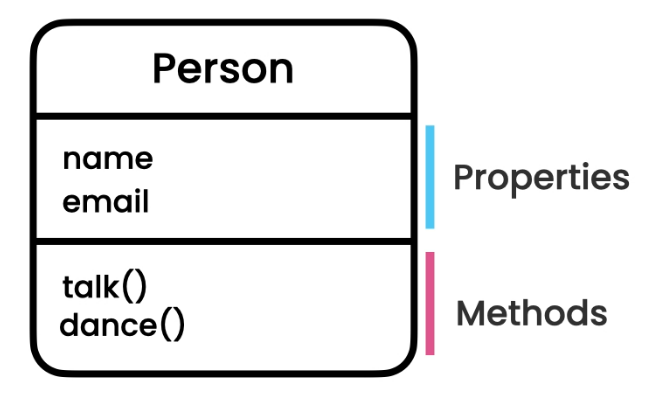

Object-Oriented Programming (OOP) is often compared with Functional Programming. In Functional Programming, functions are the building blocks of an application, whereas in OOP, objects are the building blocks.

Each programming paradigm has its own strengths and weaknesses, and they offer different ways to structure and solve problems in software development.



# Creating Claases

A class is the blueprint for an object. It is like an object factory that defines the properties and behaviors that the objects created from it will have.

In [1]:
class Account {
    id:number;
    owner:string;
    balance:number;

    constructor(id:number, owner:string, balance:number) {
        this.id = id;
        this.owner = owner;
        this.balance = balance;
    }

    deposit(amount:number):void {
        if (amount <= 0) {
            throw new Error("Deposit amount must be positive");
        }
        this.balance += amount;
    }
}

In Java, we can declare a variable in a class without initializing it. Java will `automatically assign a default value` (like 0 for numbers or null for objects).

But in TypeScript, we cannot leave class properties uninitialized unless we:

- Use a constructor to initialize them

- Assign a default value,

- Mark them as optional (?),

- Use a definite assignment assertion (!).

So, in TypeScript, it's generally **`required to initialize class properties either directly or through the constructor`**.

# Creating Objects

By using the **`new`** operator, we can create (or instantiate) a new object from an existing class.

In [ ]:
let account = new Account(1, "John Doe", 1000);
account.deposit(500);
console.log(account.balance)

console.log("account is : ", account)

1500
account is :  Account { id: 1, owner: "John Doe", balance: 1500 }


In [5]:
// Check the type of account

console.log("Type of account is: ", typeof account);

Type of account is:  object


No matter what the underlying class is, the typeof operator always returns `"object"` for class-based instances.

So, if we use **type guards** to narrow down the type, and we are dealing with **custom objects**, we should use the `instanceof` keyword.

In [6]:
console.log("account is an instance of Account: ", account instanceof Account);

account is an instance of Account:  true


# Read-Only and Optional Properties

By using the `readonly` keyword, we can make a property **read-only**, meaning it can be assigned only once (usually in the constructor) and cannot be changed afterward.

By using the **optional** (`?`) modifier, we can make a property **optional**, so we don't have to initialize it when creating an object.

In [ ]:
class Account {
    readonly id:number; // read-only property
    name:string;
    balance:number;
    nickname?:string; // optional property

    constructor(id:number, name:string, balance:number) {
        this.id = id;
        this.name = name;
        this.balance = balance;
    }
}

# Access Control Keyword ( Access Modifiers )

In TypeScript, there are three types of access modifiers:

- public

- private

- protected

By default, all properties and methods are public, so you don’t need to explicitly use the public keyword.

If a property or method is marked as private, it can only be accessed within the class itself. By convention, private properties are often prefixed with an underscore (_) to indicate their restricted access.

Access modifiers can be applied to both properties and methods in a class.


In [ ]:
class Account {
    readonly id:number; 
    name:string;
    private _balance:number;

    constructor(id:number, name:string, balance:number) {
        this.id = id;
        this.name = name;
        this._balance = balance;
    }

    deposit(amount:number):void {
        if (amount <= 0) {
            throw new Error("Deposit amount must be positive");
        }
        this._balance += amount;
    }

    getBalance():number {
        return this._balance;
    }

    private calculateTax():number {
        return this._balance * 0.15; 
    }
}

let account2 = new Account(2, "Jane Doe", 1000);
account2.deposit(300);
console.log(account2.getBalance());

1300


# Parameter Properties

In TypeScript, when we declare a class, we usually have to declare properties **and** initialize them inside the constructor, which can be repetitive.

To simplify this, TypeScript allows us to declare and initialize properties **in one step** directly in the constructor parameters using **parameter properties**.

In [ ]:
class Account {
    constructor(
        public readonly id:number, 
        public name:string,
        private _balance:number , 
        public nickname?: string ) {    
        }

    deposit(amount:number):void {
        if (amount <= 0) {
            throw new Error("Deposit amount must be positive");
        }
        this._balance += amount;
    }
}

# Getters and Setters

It would be better if we could **get and set a property directly**, instead of using methods like `getBalance()`(In Access Modifier Example).

To achieve this in TypeScript, we can use **getters** and **setters**, which allow us to access or update properties like regular variables while still keeping control over the logic.

In [6]:
class Account {
    constructor(
        public readonly id:number, 
        public name:string,
        private _balance:number , 
        public nickname?: string ) {    
    }

    deposit(amount:number):void {
        if (amount <= 0) {
            throw new Error("Deposit amount must be positive");
        }
        this._balance += amount;
    }

    get balance(): number{
        return this._balance;
    }

    // Setter is only demonstrae for example, not recommended to set balance directly
    set balance(value:number): void {
        if(value < 0){
            throw new Error("Invalid Value");
        }
        this._balance = value;
    } 
}


let account = new Account(3, "John" , 1000)
account.deposit(500);
console.log(account.balance); // using getter
account.balance = 2000; // using setter
console.log(account.balance);

1500
2000


# Index Signature

In JavaScript, we can create an object and add properties to it dynamically without any issues.

However, in TypeScript, this is not allowed by default because TypeScript is strict about the **shape of an object** —meaning all expected properties must be defined in advance.

But there are situations where we need to add properties dynamically. This is where index signatures come in.

#### Example scenario:

Suppose we're building a ticketing application for concerts. For each concert, we want to track **who is sitting where** (e.g., John is at A1, Jim is at A2).

We can't manually define each seat as a separate property like `A1`, `A2`, etc., especially if the venue has **hundreds or thousands of seats, or if each venue uses different seat labels.**

In such cases, we use an **index signature** to allow dynamic property names while still getting type safety.

In [ ]:
class SeatAssignment {
    // Index signature property
    [seatNumber: string]: string;
}

let seats = new SeatAssignment();
seats.A1 = "John Doe";
seats.A2 = "Jane Smith";
seats["A3"] = "Alice Johnson";

console.log(seats); 

SeatAssignment {
  A1: "John Doe",
  A2: "Jane Smith",
  A3: "Alice Johnson"
}


# Static Members

In [1]:
class Ride {
    activeRides : number = 0;

    start() { this.activeRides++; }
    stop() { this.activeRides--; }
}

let ride1 = new Ride();
ride1.start();

let ride2 = new Ride();
ride2.start();

console.log(ride1.activeRides)
console.log(ride2.activeRides)

1
1


In the example above, each object of the Ride class maintains its own activeRides property independently. However, if we want to track the total number of active rides across all objects, we need a shared, global location for that data. This is where **static properties** are useful. 

Static properties belong to the **class itself**, not to individual instances, which means there is only **one shared copy** of the property in memory. They are accessed using the class name and the dot (.) operator, rather than through specific object instances. This makes static members ideal for tracking values that should be consistent across all instances of a class.

In [ ]:
class Ride {
    static activeRides : number = 0;

    start() { Ride.activeRides++; }
    stop() { Ride.activeRides--; }
}

let ride1 = new Ride();
ride1.start();

let ride2 = new Ride();
ride2.start();

console.log(Ride.activeRides)

2


To improve the robustness of the code, we can make the `activeRides` property **private**, so it **cannot be accessed or modified directly** from outside the class. This helps protect the internal state and ensures it can only be changed through controlled methods.

In [5]:
class Ride {
    private static _activeRides : number = 0;

    start() { Ride._activeRides++; }
    stop() { Ride._activeRides--; }

    static get activeRidesCount(): number {
        return Ride._activeRides;
    }
}

let ride1 = new Ride();
ride1.start();

let ride2 = new Ride();
ride2.start();

console.log(Ride.activeRidesCount)

2


# Inheritance

Inheritance is the mechanism by which one class **can extend or inherit** the properties and methods of another class. This allows for **code reuse** and helps create a hierarchical relationship between classes.

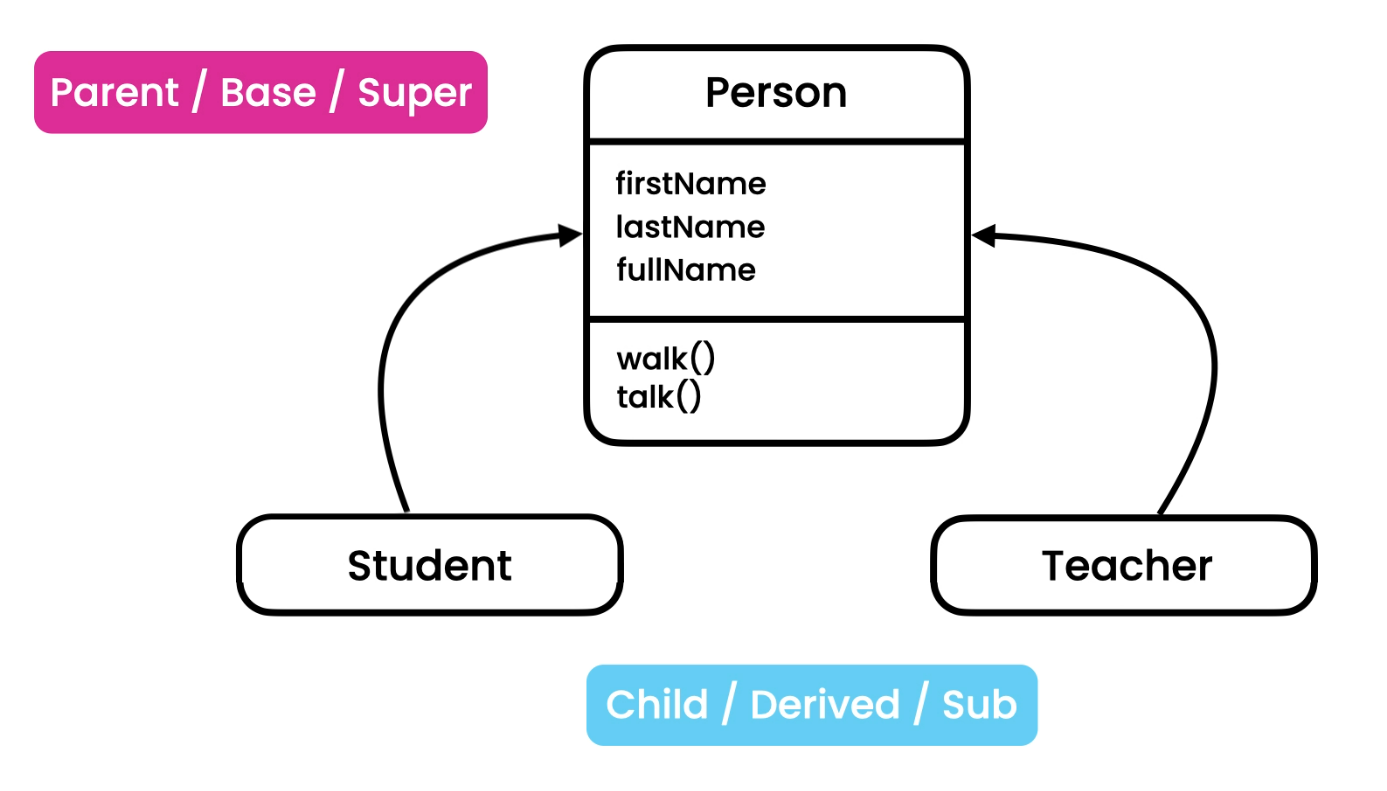

In [6]:
class Person{
    constructor(public firstName:string, public lastName:string) {}

    get fullName() {
        return this.firstName + " " + this.lastName;
    }

    walk() {
        console.log("walking")
    }
}

class Student extends Person {
    constructor(public studentId:number, firstName:string, lastName:string) {
        super(firstName, lastName);
    }

    takeTest() {
        console.log("Taking test");
    }
}

let s1 = new Student(1, "John", "Doe");
console.log(s1.fullName)

John Doe


In the code above, there are two important points:

1. In the constructor of the `Student` class, we must first call the constructor of the parent class (`Person`) using the `super` keyword. 
-  In TypeScript, when we use parameter properties in Parent Class, we  define a constructor explicitly. So when extending a class and when we have parameter properties in child class, we must always call the parent constructor using the super keyword explicitly . 
- If we don't use the parameter properties in child , we don't need to call the parent constructor using `super` keyword. ( It will automatically call it )

2. When we use access modifiers like `public` in the constructor parameters, TypeScript automatically creates properties for those parameters. However, in the `Student` class constructor, we don’t need to use access modifiers for `firstName` and `lastName` because these properties are already declared and initialized in the parent Person class. They are just passed as regular parameters here.

-----------------------------------------

#### Extra - ( Calling constructor ) -> 

ChatGPT said:
In TypeScript, the default constructor of a parent class is not called automatically if you define a constructor in the child class.

Here's how it works:

- ✅ **If you do not define a constructor** in the child class, TypeScript will **automatically call the default constructor** of the parent class (“default constructor” means the constructor that exists in the parent class—whether it’s a no-argument (empty) constructor or a custom one with parameters).

- ❌ **But if you do define a constructor** in the child class, then **you must explicitly call** `super()` in the constructor — otherwise, you’ll get a compile-time error.


#### Summary 

- If the **child class has its own constructor**, you **must explicitly call the parent’s constructor** using super() inside it. (“Parent constructor” means whatever constructor the parent class has — default or parameterized.)

- If the **child class does NOT have a constructor**, then TypeScript will **automatically call the parent’s constructor** when you create an instance of the child class.

# Method Overriding

Method overriding means **redefining a method in a child class** that already exists in the parent class, to provide a **custom implementation** specific to the child class.

In [ ]:
class Person{
    constructor(public firstName:string, public lastName:string) {}

    get fullName() {
        return this.firstName + " " + this.lastName;
    }

    walk() {
        console.log("walking")
    }
}


class Teacher extends Person {
    override get fullName( ): string {
        return "Professor" + " " + this.firstName + " " + this.lastName;
    }
    
}

let t1 = new Teacher("Jane", "Smith");
console.log(t1.fullName);

Professor Jane Smith


If we want to use the parent class’s implementation of a method or getter inside the child class, we can call it using the `super` keyword.

In [11]:
class Person{
    constructor(public firstName:string, public lastName:string) {}

    get fullName() {
        return this.firstName + " " + this.lastName;
    }

    walk() {
        console.log("walking")
    }
}


class Teacher extends Person {

    override get fullName( ): string {
        return "Professor" + " " + super.fullName;
    }
    
}

let t1 = new Teacher("Jane", "Smith");
console.log(t1.fullName);

Professor Jane Smith


# Polymorphism

Polymorphism means "many forms." It describes the ability of an object to take on different forms or behaviors depending on the context.

In [12]:
class Person{
    constructor(public firstName:string, public lastName:string) {}
    get fullName() {
        return this.firstName + " " + this.lastName;
    }
    walk() {
        console.log("walking")
    }
}

class Student extends Person {
    constructor(public studentId:number, firstName:string, lastName:string) {
        super(firstName, lastName);
    }
    takeTest() {
        console.log("Taking test");
    }
}

class Teacher extends Person {
    override get fullName( ): string {
        return "Professor" + " " + super.fullName;
    } 
}


printFullName([new Student(1, "John", "Doe"), new Teacher("Jane", "Smith")]);


function printFullName(person: Person[]): void {
    for (let p of person) {
        console.log(p.fullName);
    }
}

John Doe
Professor Jane Smith


The above example demonstrates **polymorphism**. Here, the variable `p` is of type `Person`, but during each iteration, it takes on a different form: in the first iteration, `p` is a `Student`, and in the second, it is a Teacher.

This means our `Person` reference is **polymorphic** — it can represent objects of different classes that inherit from `Person`. This is powerful because tomorrow, if we add a new class like `Principal` with its own behavior, we can still use the same `printFullName` function to print the name without changing any code.

**Note**: To achieve polymorphism in TypeScript, we should use the `override` keyword in child classes when redefining methods or getters from the base class. This ensures the method correctly overrides the one defined in the parent class. Without `override`, the method may not be properly linked to the base class method.

----------

This brings us to another important principle in OOP called the **Open-Closed Principle**. Polymorphism allow us to follow the Open-Closed Principle

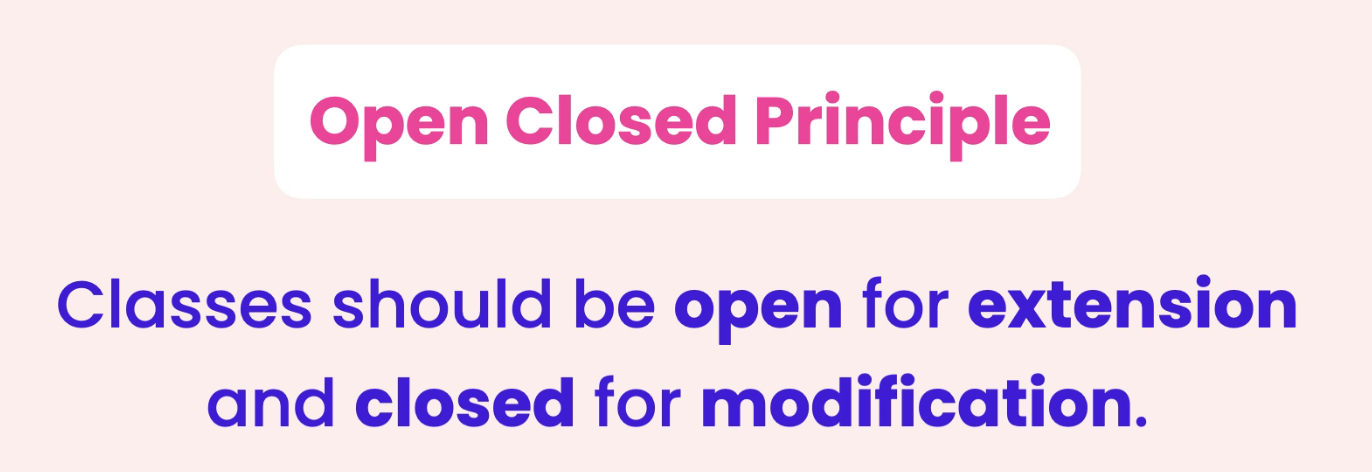

# Private vs Protected Members

The difference between private and protected members is:

- Private members can only be accessed **within the class** where they are defined.

- Protected members can be accessed **within the class and also by its subclasses**.

In [14]:
class Person{
    constructor(public firstName:string, public lastName:string) {}
    get fullName() {
        return this.firstName + " " + this.lastName;
    }
    protected walk() {
        console.log("walking")
    }
}

class Student extends Person {
    constructor(public studentId:number, firstName:string, lastName:string) {
        super(firstName, lastName);
    }

    takeTest() {
        this.walk()
        console.log("Taking test");
    }
}

let s1 = new Student(1, "John", "Doe");
s1.takeTest(); 

walking
Taking test


Avoid using `protected` unless you really need to. It can make your code harder to understand and maintain. In most cases, it's better to keep members `private` to ensure they're only accessed within the class itself.

# Abstract Classes and Methods

Using the `abstract` keyword on a `class` means that the class **cannot be instantiated directly**. Instead, it must be **extended by another class**.

Abstract classes often contain `abstract methods`, which are method declarations **without any implementation**. These act as a blueprint that must be implemented by the subclasses. (Abstract methods can only exist inside abstract classes.)



In [ ]:
abstract class Shape{
    constructor(public color:string) {}

    abstract render(): void ;
}

class Circle extends Shape{
    constructor(color:string, public radius:number) {
        super(color);
    }

    override render(): void {
        console.log("rendering a circle");
    }
}

In the example above, there’s no point in creating an object directly from the `Shape` class because it represents a general concept and doesn’t have a specific implementation — especially for the `render` method. It’s meant to serve as a common blueprint for more specific shapes like `Circle`. That’s why we mark `Shape` as an abstract class. We then extend it with concrete classes like `Circle`, which provide the actual implementation.

# Interfaces

Classea are used as Blueprints for creating objects. Interfaces are used to define the shape of objects.

In [ ]:
// Abstract Class
abstract class Calendar {
    constructor(public name: string) {}

    abstract addEvent() : void;
    abstract removeEvent() : void;
}

// Interfaces
interface Calendar {
    name: string;
    addEvent(): void;
    removeEvent(): void;
}

#### Abstract Classes vs Interfaces:

If we want to share both logic (implementation) and structure among multiple subclasses, we should use abstract classes. Abstract classes can contain implemented methods and properties, allowing us to reuse common functionality.

On the other hand, interfaces cannot contain implementations, they only define the structure or "shape" of an object (i.e., method signatures and property declarations). So if we only need to define how an object should look, without providing any behavior, interfaces are the better choice.

**Note**: In TypeScript, we can extend one interface from one or more interfaces using the extends keyword. This allows us to combine multiple interfaces into a single one.

In [ ]:
interface CloudCalendar extends Calendar {
    sync(): void;
}

We can implement interfaces in TypeScript using the `implements` keyword. This means a class agrees to follow the structure (shape) defined by the interface.

In [ ]:
class GoogleCalendar implements Calendar {
    constructor(public name: string) {}

    addEvent(): void {
        console.log("Adding event to Google Calendar");
    }

    removeEvent(): void {
        console.log("Removing event from Google Calendar");
    }

}

# My Note - Interfaces vs Types

Use `type` to define **object shapes, unions, intersections**, or more complex types (e.g., primitive unions, tuples). Can represent **primitive types, unions, intersections**, and other advanced type constructs.

`Interfaces` are primarily designed to describe the **shape of objects and classes**. Can be **implemented by classes** using the `implements` keyword.

But, Interfaces and type aliases can be used interchangeably.

In [ ]:
// Object Declaration Example - type

type person = {
    name: string;
}

let person: person = {
    name: "John Doe"
};

// Object Declaration Example - interface

interface Animal {
    name: string;
}

let animal: Animal = {
    name: "Lion"
};

console.log(person);
console.log(animal);

{ name: "John Doe" }
{ name: "Lion" }


In [16]:
// Inheriting example - type

type Person1 = {
    name: string;

    walk(): ( ) => void;
}

class Student1 implements Person1 {
    constructor(public name: string) {}

    walk(): () => void {
        return () => {
            console.log(`${this.name} is walking`);
        };
    }
}

// Inheriting example - interface

interface Person2 {
    name: string;

    walk(): () => void;
}

class Student2 implements Person2 {
    constructor(public name: string) {}

    walk(): () => void {
        return () => {
            console.log(`${this.name} is walking`);
        };
    }
}


let s1 = new Student1("John");
let s2 = new Student2("Alan");

console.log(s1);
console.log(s2);

Student1 { name: "John" }
Student2 { name: "Alan" }


You can use both types and interfaces for declaring objects, but interfaces are preferred when extending or inheriting because they support extension and declaration merging better.